In [1]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# to show gray image to show image matrix

In [3]:
img_gray = cv2.imread('Lenna.png', 0)

In [4]:
cv2.imshow('Lenna',img_gray)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
print(img_gray)

[[140 133 128 ... 222 218 213]
 [140 133 128 ... 222 218 213]
 [140 133 128 ... 222 218 213]
 ...
 [141 129 131 ... 128 129 129]
 [129 115 111 ... 126 130 129]
 [127 107 103 ... 135 132 132]]


In [5]:
# to show image data type
print(img_gray.dtype)

uint8


In [6]:
# to show gray image shape
print(img_gray.shape)

(509L, 359L)


In [7]:
# to show origin image
import cv2

In [8]:
img = cv2.imread('Lenna.png')
cv2.imshow('Lenna',img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [9]:
# to show color image to show channels
print(img)

[[[103  98 203]
  [ 91  82 202]
  [ 98  86 187]
  ...
  [162 215 252]
  [156 210 249]
  [149 204 247]]

 [[103  98 203]
  [ 91  82 202]
  [ 98  86 187]
  ...
  [162 215 252]
  [156 210 249]
  [149 204 247]]

 [[103  98 203]
  [ 91  82 202]
  [ 98  86 187]
  ...
  [162 215 252]
  [156 210 249]
  [149 204 247]]

 ...

 [[ 88 101 204]
  [112  92 183]
  [110 102 178]
  ...
  [ 83  84 191]
  [ 81  84 194]
  [ 82  86 192]]

 [[ 87  90 188]
  [105  73 169]
  [ 95  78 158]
  ...
  [ 80  81 191]
  [ 83  89 191]
  [ 84  85 193]]

 [[ 85  85 187]
  [ 99  72 155]
  [ 95  72 145]
  ...
  [ 85  93 199]
  [ 87  89 195]
  [ 82  87 197]]]


In [10]:
print(img.shape)

(509L, 359L, 3L)


In [11]:
#img crop
img_crop = img[0:100, 0:200]
cv2.imshow('img_crop', img_crop)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()


In [12]:
# color split
B, G, R = cv2.split(img)
cv2.imshow('B', B)
cv2.imshow('G', G)
cv2.imshow('R', R)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
print(B)
print(len(B))
print(len(B[0]))

[[103  91  98 ... 162 156 149]
 [103  91  98 ... 162 156 149]
 [103  91  98 ... 162 156 149]
 ...
 [ 88 112 110 ...  83  81  82]
 [ 87 105  95 ...  80  83  84]
 [ 85  99  95 ...  85  87  82]]
509
359


In [13]:
#change color of image
def random_light_color(img):
    #brightness
    B, G, R = cv2.split(img)
    
    b_rand = random.randint(-50, 50)
    if b_rand == 0:
        pass
    elif b_rand > 0:
        lim = 255 - b_rand
        B[B > lim] = 255
        B[B <= lim] = (b_rand + B[B <= lim]).astype(img.dtype)
        
    g_rand = random.randint(-50, 50)
    if g_rand == 0:
        pass
    elif g_rand > 0:
        lim = 255 - g_rand
        G[G > lim] = 255
        G[G <= lim] = (g_rand + G[G <= lim]).astype(img.dtype)  
        
    r_rand = random.randint(-50, 50)
    if r_rand == 0:
        pass
    elif r_rand > 0:
        lim = 255 - r_rand
        R[R > lim] = 255
        R[R <= lim] = (r_rand + R[R <= lim]).astype(img.dtype)    
    img_merge = cv2.merge((B, G, R))
    return img_merge
img_random_color = random_light_color(img)
cv2.imshow('img_random_color',img_random_color)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()


In [14]:
# gamma correction
img_dark = cv2.imread('dark.png')
cv2.imshow('img_dark', img_dark)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
def adjust_gamma(image, gamma = 1.0):
    invGamma = 1.0 / gamma
    table = []
    for i in range(256):
        table.append((((i / 255.0) ** invGamma) * 255))
    table = np.array(table).astype("uint8")
    return cv2.LUT(img_dark, table)
img_brighter = adjust_gamma(img_dark, 2)
cv2.imshow('img_dark', img_dark)
cv2.imshow('img_brighter', img_brighter)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()


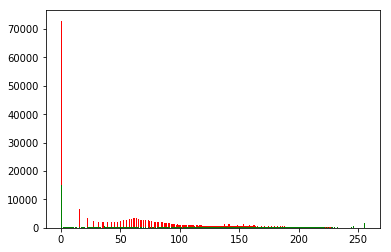

In [15]:
# histogram adjust
img_small_brighter = cv2.resize(img_brighter, (int(img_brighter.shape[0]*0.5), int(img_brighter.shape[1]*0.5)))
plt.hist(img_brighter.flatten(), 256, [0, 256], color = 'r')
img_yuv = cv2.cvtColor(img_small_brighter, cv2.COLOR_BGR2YUV)
# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])   # only for luminance(明亮度) channel
# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)   # y: luminance(明亮度), u&v: 色度饱和度
cv2.imshow('Color input image', img_small_brighter)
cv2.imshow('Histogram equalized', img_output)
plt.hist(img_output.flatten(), 256, [0, 256], color = 'g')
key = cv2.waitKey(0)
if key == 27:
    exit()

In [16]:
img = cv2.imread('C:/Lenna.png')
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 1)
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
print (M)

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
# set M[0][2] = M[1][2] = 0
M[0][2] = M[1][2] = 0
print(M)
img_rotate2 = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated2 lenna', img_rotate2)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [ ]:
# scale+rotation+translation = similarity transform
img = cv2.imread('Lenna.png')
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 0.5 )#center angle scale
img_rotated = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated Lenna', img_rotated)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
print(M)

In [ ]:
#Affine Transform
rows, cols, ch = img.shape
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1 ], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('affine lenna', dst)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
print(M)

In [ ]:
# perspective transform
def random_warp(img):
    height, width, channels = img.shape

    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])#做投射变换需要4个点，原来的点
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])#做投射变换需要4个点，目标点
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp


M_warp, img_warp = random_warp(img)
cv2.imshow('lenna_warp', img_warp)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()